In [4]:
import wcs
from wcs import TermData
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import namedtuple

CONTESTED_MLE = TermData(term=-2, abbrev='Co', translation='Contested')
NO_MLE = TermData(term=-1, abbrev="No", translation="None")

word_counts = {}
term_maps = {}
langs = [16]
# for lang in wcs.ALL_LANGS:
for lang in langs:
    print("building word count and term map for lang ", lang)
    word_counts[lang] = wcs.build_word_count(lang)
    term_maps[lang] = wcs.build_term_map(lang)

building word count and term map for lang  16
LANG 16 ABBREV D has more than one term
LANG 16 ABBREV L has more than one term
LANG 16 ABBREV K has more than one term
LANG 16 ABBREV N has more than one term
LANG 16 ABBREV G has more than one term
LANG 16 ABBREV X has more than one term
LANG 16 ABBREV I has more than one term


In [52]:
def build_simple_mle(word_count, term_map):
    """Returns a map of chipnum -> TermData where each
    chipnum is mapped to the majority term for that chip,
    if there is no majority, it is mapped to CONTESTED_MLE"""
    mles = {}
    
    for chip in wcs.ALL_CHIPS:
        terms = np.argwhere(word_count[:, chip-1] == np.max(word_count[:, chip-1]))
        if len(terms) > 1:
            print("Chip {} was contested".format(chip))
            mles[chip] = CONTESTED_MLE
        else:
            term = terms[0,0]
            mles[chip] = term_map[term+1]
            
        # print("Row data for chip {}".format(chip))
        # print(word_count[:, chip-1])
        # print("for chip {} got mle = {}".format(chip, mle[chip]))
    
    return mles

def get_BCTs(mles):
    """From the mles return the TermData for each MLE term"""
    bcts = set(mles.values())
    bcts.remove(CONTESTED_MLE)
    return list(bcts)
    
        
def simple_mle_grid(mles, lang):
    # plot the wcs grid with the mle estimate
    fig, ax = plt.subplots()
    num_cols = 41
    num_rows = len('ABCDEFGHIJ')
    X, Y = np.meshgrid(np.arange(num_cols), np.arange(num_rows))
    Z = np.zeros((num_rows, num_cols), dtype=int)
   
    cmap_list = ['xkcd:pale yellow', 'white', 'xkcd:light pink', 'xkcd:peach', 'xkcd:beige',
                 'xkcd:salmon', 'xkcd:lilac', 
                 'xkcd:tan', 'xkcd:puke green', 'xkcd:rose',
                 'xkcd:seafoam green', 'xkcd:mint green', 'xkcd:baby blue',
                 'xkcd:olive', 'xkcd:forest green', 'xkcd:deep blue',
                 'xkcd:purple blue', 'xkcd:chocolate', 'xkcd:charcoal']
    if len(np.unique(mles.values())) > len(cmap_list) - 1:
        print("ERROR: too many cats, cmap does not have enough colors")
        
    
    for row in range(num_rows):
        for col in range(num_cols):
            if (row, col) in wcs.matrix_to_chipnum:
                # +1 to make no_mle_val always be white
                Z[row, col] = mles[wcs.matrix_to_chipnum[(row, col)]].term
            else:
                Z[row, col] = NO_MLE.term
                # print("using no_mle_val for col {} and row {}".format(col, row))
                                   
    mle_terms = set([(data.term, data.abbrev) for data in mles.values()])
    mle_terms.add((NO_MLE.term, NO_MLE.abbrev))
    abbrev_labels = [pair[1] for pair in sorted(mle_terms)]
    print(abbrev_labels)
    
    print(cmap_list[:len(abbrev_labels)])
    cmap = ListedColormap(cmap_list[:len(abbrev_labels)])
    mesh = ax.pcolormesh(X, Y, Z, shading='auto', edgecolors='black', cmap=cmap)
    cbar = fig.colorbar(mesh, ax=ax)
    cbar.ax.set_yticklabels
    ax.set_title('MLE Categories for Language {}'.format(lang))
    # ax.legend()

    fig.set_size_inches((32, 8))
    plt.show()
    # plt.savefig('lang{}_simpleMLEgrid.png'.format(language))

Chip 26 was contested
Chip 63 was contested
Chip 105 was contested
Chip 138 was contested
Chip 215 was contested
['Co', 'No', 'J', 'R', 'D', 'M', 'L', 'E']
['xkcd:pale yellow', 'white', 'xkcd:light pink', 'xkcd:peach', 'xkcd:beige', 'xkcd:salmon', 'xkcd:lilac', 'xkcd:tan']


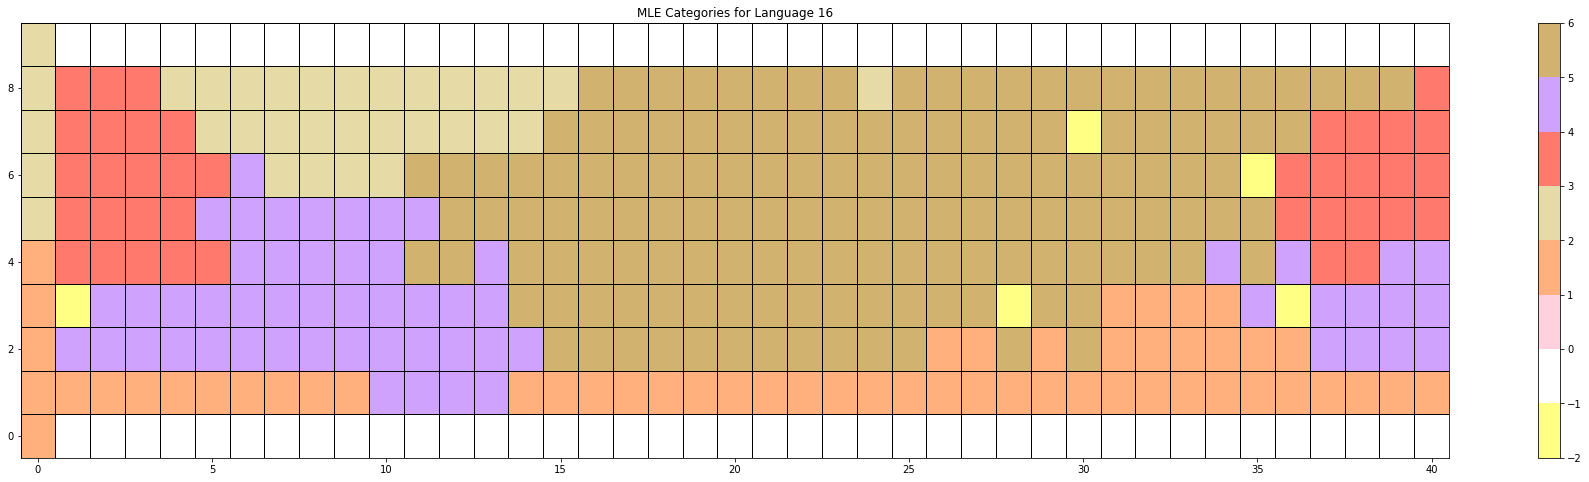

In [54]:
lang = 16
mles = build_simple_mle(word_counts[lang], term_maps[lang])
bcts = get_BCTs(mles)
simple_mle_grid(mles, lang)